RMSE is  0.4552828517435842


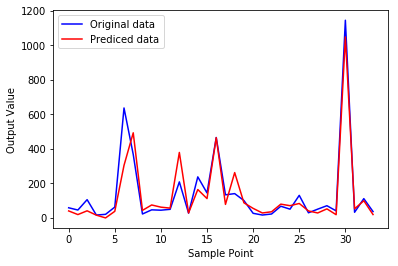

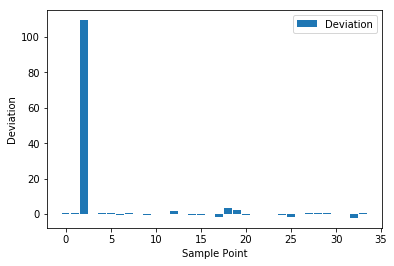

In [7]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler     #data preprocessing
from sklearn.model_selection import train_test_split  #import dataset split 
from sklearn import metrics
import matplotlib as mpl   
import matplotlib.pyplot as plt

class SingleHiddenLayer(object):

    def __init__(self,X,y,num_hidden):
        self.data_x = np.atleast_2d(X)       
        self.data_y = np.array(y).flatten()  
        #the number of input data
        self.num_data = len(self.data_x)  
        self.num_feature = self.data_x.shape[1] 
        # the number of hidden nodes
        self.num_hidden = num_hidden  
        
        # initialize the weight matrix[num_feature,num_hidden] as values in [-1,1]
        self.w = np.random.uniform(-1, 1, (self.num_feature, self.num_hidden)) 
        #Initialize the bias b
        for i in range(self.num_hidden):
            b = np.random.uniform(-0.6, 0.6, (1, self.num_hidden))
            self.first_b = b
        #make bias matrix
        for i in range(self.num_data-1):
            b = np.row_stack((b, self.first_b))  
        self.b = b
        
    #define sigmoid function
    def sigmoid(self,x):
        return 1.0 / (1 + np.exp(-x))
    
    #define the train process function   
    def train(self,x_train,y_train):
        mul = np.dot(self.data_x, self.w)    #input training data @ weight matrix
        add = mul + self.b                   #add bias matrix
        H = self.sigmoid(add)                #activated by sigmoid function
        H_ = np.linalg.pinv(H)               #make the Moore-Penrose inverse
        self.out_w = np.dot(H_,y_train)      #get the output weight 
        
    # define the predic process function
    def predict(self,x_test,mu,sigma):
        self.t_data = np.atleast_2d(x_test)    #input test data
        self.num_tdata = len(self.t_data)      #the number of the data
        self.pred_Y = np.zeros((x_test.shape[0]))  #initialization      
        b = self.first_b      
        for i in range(self.num_tdata-1):
            b = np.row_stack((b, self.first_b))  #bias matrix
        #predict 
        self.pred_Y = np.dot(self.sigmoid(np.dot(self.t_data,self.w)+b),self.out_w)
         #inverse min-max
        #predic_data = min_max_scaler.inverse_transform(self.pred_Y)
        predic_data=self.pred_Y*sigma+mu
      
        Id=np.arange(len(predic_data))
        

        #save the output data as csv named as y_test.
        dataframe = pd.DataFrame({'Id':Id,'PRP':predic_data})
        dataframe.to_csv("y_test.csv",index=False,sep=',')
        

    def RMSE(self,y_test,mu,sigma):

        ee=(y_test-self.pred_Y)
        RMSE=np.sqrt(np.mean(ee**2))
        print("RMSE is ",RMSE)

        origin_data=y_test*sigma+mu
        #print("Origin:",origin_data,origin_data.shape)
        predic_data=self.pred_Y*sigma+mu
        #print("predic",predic_data,predic_data.shape)
        #plot the predict outputs and the original outputs
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.plot(origin_data[:],'b',label="Original data")
        ax.plot(predic_data[:],'r',label="Prediced data")
        ax.set_xlabel("Sample Point")  
        ax.set_ylabel("Output Value")        
        ax.legend()
        
        # plot the deviation between the predict outputs and the original outputs
        fig = plt.figure()    
        ax=fig.add_subplot(1,1,1)
        dev=(self.pred_Y-y_test)/y_test
        ax.bar(np.arange(len(dev)),dev,label="Deviation")
        ax.set_xlabel("Sample Point")  
        ax.set_ylabel("Deviation")        
        ax.legend()
        
#read dataset
x_train_file = np.loadtxt(open("x_train.csv","rb"),delimiter=",",skiprows=1)
y_train_file = np.loadtxt(open("y_train.csv","rb"),delimiter=",",skiprows=1)
x_test_file = np.loadtxt(open("x_test.csv","rb"),delimiter=",",skiprows=1)
y_train_file1=y_train_file[:,1]
#normalization
ss = StandardScaler()
x=ss.fit_transform(x_train_file)
x_test_G=ss.fit_transform(x_test_file)

mu=np.mean(y_train_file1)
sigma=np.std(y_train_file1)
y=(y_train_file1-mu)/sigma


#split the training data into two part:traing part and testing part 
#80% of the data is used to train the model
#20% of the data use to generalize,
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=0)

ELM = SingleHiddenLayer(x_train,y_train,25)   
ELM .train(x_train,y_train)
ELM .predict(x_test,mu,sigma)
ELM .RMSE(y_test,mu,sigma)


        

